In [76]:
import pandas as pd 
import numpy as nu 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [77]:
train = pd.read_csv('train_loan.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
train.drop('Loan_ID', axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [79]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [80]:
train['Loan_Status'] = train['Loan_Status'].apply(lambda x : 0 if x == 'N' else 1)

In [81]:
train['Gender'] = train['Gender'].apply(lambda x : 0 if x == 'Female' else 1)

In [82]:
train['Married'] = train['Married'].apply(lambda x : 0 if x == 'No' else 1)

In [83]:
train['Dependents'] = LabelEncoder().fit_transform(train['Dependents'])

In [84]:
train['Education'] = train['Education'].apply(lambda x : 0 if x == 'Not Graduate' else 1)

In [85]:
train['Self_Employed'] = train['Self_Employed'].apply(lambda x : 0 if x == 'No' else 1)

In [86]:
train['Property_Area'] = LabelEncoder().fit_transform(train['Property_Area'])

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(2), int64(6)
memory usage: 52.9 KB


<AxesSubplot:>

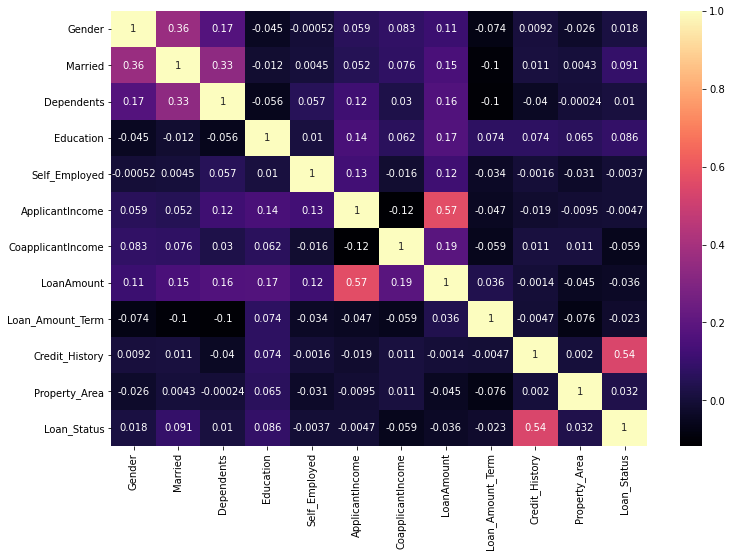

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap='magma')

In [89]:
# train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = MinMaxScaler().fit_transform(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [90]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [91]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression()

In [95]:
model.fit(x_train, y_train)

LogisticRegression()

In [96]:
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [99]:
scores = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(x_test)))

In [100]:
max(scores)

0.8961038961038961

In [101]:
r_state = scores.index(max(scores))
r_state

955

In [102]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=r_state)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8961038961038961

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        36
           1       0.90      0.97      0.93       118

    accuracy                           0.90       154
   macro avg       0.89      0.81      0.84       154
weighted avg       0.90      0.90      0.89       154



In [104]:
confusion_matrix(y_test, y_pred)

array([[ 23,  13],
       [  3, 115]], dtype=int64)

In [105]:
import pickle
pickle.dump(model, open('loan_predictor.pkl', 'wb'))

In [106]:
train.iloc[0, :]

Gender                  1.000000
Married                 0.000000
Dependents              0.000000
Education               1.000000
Self_Employed           0.000000
ApplicantIncome      5849.000000
CoapplicantIncome       0.000000
LoanAmount            146.412162
Loan_Amount_Term      360.000000
Credit_History          1.000000
Property_Area           2.000000
Loan_Status             1.000000
Name: 0, dtype: float64

In [107]:
model = pickle.load(open('loan_predictor.pkl', 'rb'))
model.predict([[1, 0, 0, 1, 0, 5849, 0.000000, 146.412162, 360, 1, 2]])

array([1], dtype=int64)

In [108]:
def data_process(gender, married, dependents, education, self_employed, property_area):
    gender = 0 if gender == 'Female' else 1
    married = 0 if married == 'No' else 1
    education = 0 if education == 'Not Graduate' else 1
    self_employed = 0 if self_employed == 'No' else 1
    dependents_dict = {
        '0' : 0, 
        '1' : 1,  
        '2' : 2,  
        '3+': 3,  
    }
    dependents = dependents_dict[dependents]
    property_area_dict = {
        'Rural': 0,
        'Semiurban': 1,
        'Urban': 2
    }
    property_area = property_area_dict[property_area]
    return gender, married, dependents, education, self_employed, property_area


In [109]:
gender, married, dependents, education, self_employed, property_area = data_process('Male', 'No', '0', 'Graduate', 'No', 'Urban')
model.predict(
    [[gender, married, dependents, education, self_employed, 5849, 0, 146.412162, 360, 1, property_area]])


array([1], dtype=int64)